# K-Means Clustering

##### The following stages will help us understand how the K-Means clustering technique works-

###### Step 1: First, we need to provide the number of clusters, K, that need to be generated by this algorithm.
###### Step 2: Next, choose K data points at random and assign each to a cluster. Briefly, categorize the data based on the number of data points.
###### Step 3: The cluster centroids will now be computed.
###### Step 4: Iterate the steps below until we find the ideal centroid, which is the assigning of data points to clusters that do not vary.
###### 4.1 The sum of squared distances between data points and centroids would be calculated first.
###### 4.2 At this point, we need to allocate each data point to the cluster that is closest to the others (centroid).
###### 4.3 Finally, compute the centroids for the clusters by averaging all of the cluster’s data points.
###### K-means implements the Expectation-Maximization strategy to solve the problem. The Expectation-step is used to assign data points to the nearest cluster, and the Maximization-step is used to compute the centroid of each cluster.


### This is a simple example of how k-means works. In this example, we will first construct a 2D dataset with four distinct blobs and then use the k-means algorithm to observe the results.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

### The code below will build a 2D dataset with four blobs.

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X

array([[ 2.50064460e-01,  6.48826703e+00],
       [-2.69798647e+00,  2.52194722e+00],
       [-2.90007604e+00,  3.06877291e+00],
       [ 7.02950576e-01,  4.31427482e+00],
       [-2.53563494e+00,  2.38449945e+00],
       [-1.70297829e+00,  7.80540956e+00],
       [ 2.22322228e+00,  8.38773426e-01],
       [ 7.93137001e-03,  4.17614316e+00],
       [-1.79041773e+00,  3.02668532e+00],
       [ 1.76747403e+00,  1.26987864e+00],
       [-9.49424332e-01,  7.81974467e+00],
       [ 2.51921931e+00,  1.87335276e-01],
       [ 2.33812285e+00,  3.43116792e+00],
       [-2.39482483e+00,  3.39806103e+00],
       [-7.91981675e-01,  2.95679593e+00],
       [ 3.22881491e+00,  1.13171965e+00],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.62350489e+00,  4.09867867e-01],
       [ 1.21767506e+00,  3.89290127e+00],
       [-1.22768985e+00,  3.54666555e+00],
       [-1.06406044e+00,  3.53554556e+00],
       [-2.07216196e+00,  2.66329169e+00],
       [-1.95483315e+00,  7.15134224e+00],
       [ 1.

### Following that, the code below will assist us in visualizing the dataset.

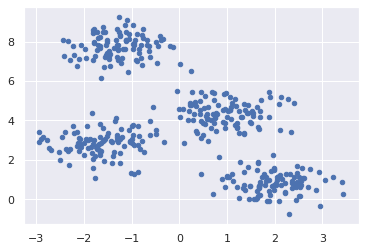

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=20);
plt.show()

### Next, create a K – means object while specifying the number of clusters, train the model, and estimate as follows-

####  The elbow method
The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. As you know, if k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

In the Elbow method, we are actually varying the number of clusters ( K ). 
For each value of K, we are calculating sum of square distances or WCSS (Within sum of suquare). 
the sum of squared distance between each point and the centroid in a cluster. 
When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1.
When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. 
The K value corresponding to this point is the optimal K value or an optimal number of clusters.


Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

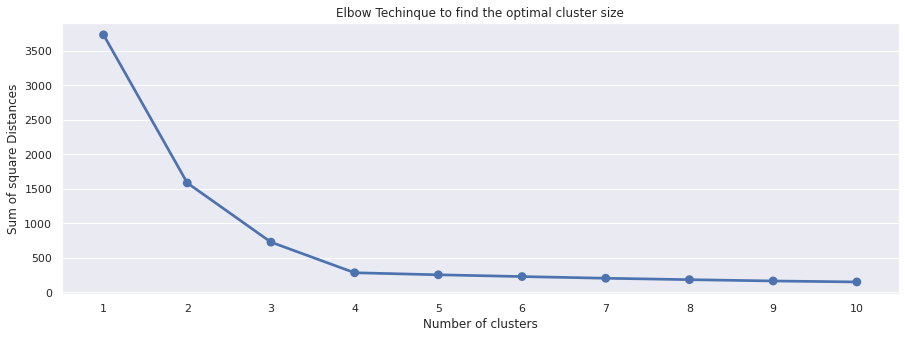

In [4]:
sum_of_sq_dist = {}
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 42)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize = (15,5))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square Distances")
plt.title("Elbow Techinque to find the optimal cluster size")

### (Optional) Train and Save Model for further same type of datasets usecases

In [9]:
import pickle

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
pickle.dump(kmeans, open("/home/srihari/Documents/trainin/model.pkl", "wb"))

# y_kmeans = kmeans.predict(X)

In [10]:
loaded_model = pickle.load(open("/home/srihari/Documents/trainin/model.pkl", 'rb'))
y_kmeans = loaded_model.predict(X)
y_kmeans

array([2, 1, 1, 0, 1, 2, 3, 0, 1, 3, 2, 3, 0, 1, 1, 3, 1, 3, 0, 1, 1, 1,
       2, 0, 0, 2, 2, 0, 0, 3, 0, 0, 1, 0, 1, 2, 3, 0, 3, 0, 1, 2, 3, 0,
       3, 2, 3, 3, 3, 2, 2, 2, 1, 2, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 0, 1,
       3, 0, 1, 2, 1, 0, 1, 2, 3, 1, 0, 1, 2, 1, 1, 0, 3, 2, 0, 1, 1, 0,
       1, 3, 1, 3, 0, 1, 1, 2, 0, 3, 3, 3, 2, 3, 0, 0, 1, 2, 0, 2, 3, 1,
       1, 1, 0, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 2, 0, 2, 3, 3, 3, 0, 2, 2,
       2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 3, 0, 1, 3, 1, 3, 0, 3, 0,
       2, 1, 3, 1, 1, 1, 0, 1, 2, 1, 1, 2, 3, 3, 1, 2, 2, 2, 2, 3, 3, 3,
       0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 3,
       3, 0, 0, 1, 3, 3, 2, 0, 1, 2, 0, 2, 0, 0, 3, 3, 2, 3, 0, 2, 3, 2,
       1, 0, 2, 1, 1, 1, 3, 2, 0, 2, 0, 1, 0, 0, 2, 3, 1, 3, 0, 1, 3, 0,
       0, 2, 3, 0, 2, 0, 3, 1, 1, 3, 1, 0, 2, 2, 0, 0, 3, 2, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2,
       3, 0, 3, 0, 3, 1, 0, 3, 1, 0, 3, 3, 0, 1, 2,

### Now, using the code below, we can plot and visualize the cluster’s centers as determined by the k-means 

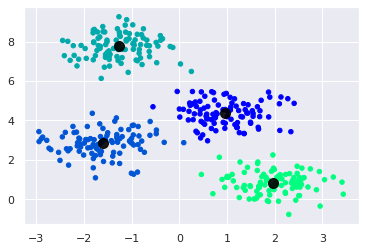

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='winter')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.9);
plt.show()